In [2]:
### Plant - Bread Classification

**Reading the images and generating the train and test dataset**

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed')

**Unzip the Folders to get the train and test data**

In [0]:
#from zipfile import ZipFile
#with ZipFile('train.zip', 'r') as z:
#  z.extractall()

In [0]:
#from zipfile import ZipFile
#with ZipFile('test.zip', 'r') as z:
#  z.extractall()

# New Section

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed')

In [7]:
ls

Plant_Breed_Final_Solution.ipynb  test/  test.zip  train/  train.zip


***Change the Directory pointer to the Train Folder and reading the data ***

In [0]:
x_train = []
y_train = []

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed/train')

In [10]:
os.listdir()

['Fat Hen',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Sugar beet',
 'Shepherds Purse',
 'Charlock',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Maize',
 'Common Chickweed',
 'Common wheat']

This indicates the directory has subfolders in it. so, we need to traverse through the directories and read the files.

In [11]:
x_train = []
y_train = []
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)


Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


In [12]:
x_train[0]


array([[[ 95, 110, 118],
        [103, 119, 126],
        [ 85,  92, 112],
        ...,
        [ 92, 111, 118],
        [105, 126, 137],
        [ 99, 119, 131]],

       [[ 60,  68,  87],
        [ 83,  97, 109],
        [ 69,  80, 103],
        ...,
        [ 94, 110, 120],
        [106, 125, 137],
        [ 89, 114, 128]],

       [[ 63,  75,  89],
        [ 68,  85,  99],
        [ 53,  71,  91],
        ...,
        [ 98, 111, 123],
        [112, 130, 141],
        [ 96, 119, 132]],

       ...,

       [[ 56,  56,  63],
        [ 49,  47,  56],
        [ 61,  58,  66],
        ...,
        [ 52,  50,  60],
        [ 37,  35,  43],
        [ 40,  41,  46]],

       [[ 51,  53,  62],
        [ 49,  48,  57],
        [ 60,  56,  66],
        ...,
        [ 50,  48,  60],
        [ 40,  40,  48],
        [ 43,  43,  49]],

       [[ 56,  57,  62],
        [ 38,  38,  46],
        [ 53,  50,  60],
        ...,
        [ 50,  48,  55],
        [ 43,  43,  49],
        [ 48,  47,  56]]

In [13]:
y_train

['Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fat Hen',
 'Fa

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)


In [15]:
encoded_labels = dum
y_train = dum
y_train.head()

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
y_train.shape

(4750, 12)

In [17]:
import numpy as np
y_train = np.array(y_train)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
x_train = np.array(x_train)

In [19]:
x_train[0].shape

(128, 128, 3)

In [0]:
# Now read and transform the x_test data.

In [21]:
x_test=[]

os.chdir('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed/test')
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
      for j in os.listdir(i):
          try:
              dummy = cv2.imread('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed/test/' + i + "/" + j)
              dummy = cv2.resize(dummy,(128,128))
              x_test.append(dummy)
              #y_test.append(i)
          except Exception as e:
              print(e)
    elif (os.path.isfile(i)):
      try:
        dummy = cv2.imread('/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Plant_Breed/test/' + "/" + i)
        dummy = cv2.resize(dummy,(128,128))
        x_test.append(dummy)
        #y_test.append(i)
      except Exception as e:
        print(e)

5315c2dca.png
19618ad6a.png
b7a7f6390.png
c0461776c.png
48231e475.png
20e562fd5.png
4bbfd1e05.png
c7ae30f3a.png
65d08b894.png
1c52ea820.png
1d0cbd819.png
e3f50adfc.png
fd87b36ae.png
3f826b318.png
54c8bb900.png
3b73c3b61.png
93079d970.png
6ba4ef411.png
7f46a71db.png
fd253a74e.png
4e69d100a.png
33448fe39.png
856f2910a.png
acdb75e00.png
a276c65f7.png
e52493d0b.png
12625488b.png
9d3cb4745.png
19b51843a.png
976e4e079.png
e0ec5b6a1.png
d84d37a61.png
22fbf13d6.png
32c86784b.png
406ecb5c5.png
3fbd0fc6a.png
4e1190d78.png
b31292706.png
219fd68d5.png
3d67c434b.png
502dff972.png
6b9d6f8c9.png
e9cd91682.png
ae90f2827.png
41f1c3cdb.png
0c45ace27.png
29bab7cad.png
1f5e5554e.png
66ab0e8d0.png
187668bde.png
bf3924a57.png
851c90831.png
8c98a6e9b.png
64fe8beb9.png
cf46d09c5.png
b341d0aab.png
c6c8d4ba0.png
edfdb4aeb.png
c0f5d9ac8.png
2693e5c65.png
0e8492cb1.png
d93c7ab6d.png
1bf9b94a6.png
0ad9e7dfb.png
ef9676433.png
0bf7bfb05.png
41e07778c.png
8e3ed0a25.png
37297a64c.png
3dd52bd2a.png
cadab6616.png
c7eb96

In [0]:
x_test = np.array(x_test)

***Divide the data set into Train and validation data sets***

In [23]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2)
print (len(x_train2))
print (len(x_val))

3562
1188


In [24]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [0]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [27]:
print (x_train2.shape)
print (x_val.shape)

(3562, 128, 128, 3)
(1188, 128, 128, 3)


In [28]:
print(y_train2.shape)
print(y_val.shape)

(3562, 12)
(1188, 12)


***Initialize & build the model***

In [29]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense

Using TensorFlow backend.


In [0]:
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam

In [31]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 12, activation = 'softmax')) 


In [32]:
optimizer = adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)      

In [34]:
batch_size = 64
nb_epochs = 20
history = model.fit(x_train,y_train,
                    epochs=nb_epochs, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4750 samples, validate on 1188 samples
Epoch 1/20
4750/4750 [==============================] - 12s 3ms/step - loss: 1.8790 - acc: 0.3497 - val_loss: 1.3360 - val_acc: 0.5421
Epoch 2/20
4750/4750 [==============================] - 9s 2ms/step - loss: 1.0630 - acc: 0.6417 - val_loss: 0.7384 - val_acc: 0.7492
Epoch 3/20
4750/4750 [==============================] - 9s 2ms/step - loss: 0.7169 - acc: 0.7554 - val_loss: 0.5151 - val_acc: 0.8199
Epoch 4/20
4750/4750 [==============================] - 9s 2ms/step - loss: 0.5105 - acc: 0.8234 - val_loss: 0.4098 - val_acc: 0.8527
Epoch 5/20
4750/4750 [==============================] - 9s 2ms/step - loss: 0.4246 - acc: 0.8501 - val_loss: 0.2862 - val_acc: 0.8998
Epoch 6/20
4750/4750 [==============================] - 9s 2ms/step - loss: 0.3166 - acc: 0.8882 - val_loss: 0.2619 - val_acc: 0.8998
Epoch 7/20
4750/4750 [=============================

Train Accuracy is 98.95%

In [35]:
x_test[0].shape

(128, 128, 3)

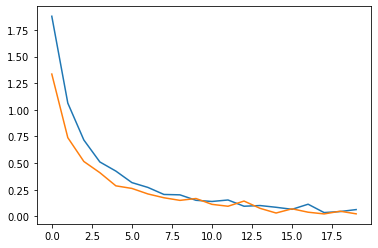

In [38]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

In [39]:
x_test[0].shape

(128, 128, 3)

In [40]:
classes = model.predict(x_test, batch_size=10,verbose=1)
len(classes)


794/794 [==============================] - 1s 1ms/step


794

In [0]:
y_test=classes

In [42]:
y_test=y_test.astype(int)
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
y_test.shape,y_train.shape


((794, 12), (4750, 12))

In [44]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

794/794 [==============================] - 1s 929us/step
[1.6365005744600703e-08, 0.17632241817355457]


In [47]:
loss_and_metrics=model.evaluate(x_train,y_train)

4750/4750 [==============================] - 3s 627us/step


In [48]:
loss_and_metrics

[0.029626494129874597, 0.9911578947368421]

In [50]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


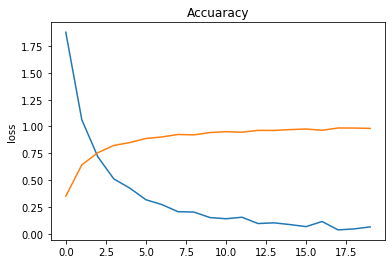

In [51]:

# summarize history for loss
plt.title('Loss vs Accuracy')
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.ylabel('loss')
plt.title('Accuaracy')
plt.show()